In [1]:
import pydot
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from six import StringIO

In [37]:
path="titanic.csv"
df=pd.read_csv(path)

In [38]:
df.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,PassengerId,Survived
0,1,0.2750,0.014151,0,0,1,0.1,1,0
1,0,0.4750,0.139136,1,0,0,0.1,2,1
2,0,0.3250,0.015469,0,0,1,0.0,3,1
3,0,0.4375,0.103644,1,0,0,0.1,4,1
4,1,0.4375,0.015713,0,0,1,0.0,5,0


In [39]:
dfData=df.iloc[:,0:8].values
dfTarget=df.iloc[:,8].values
x_train, x_test, Y_train, Y_test = train_test_split(dfData,dfTarget,test_size=0.2, random_state=0)

In [40]:
model_params={
    "max_leaf_nodes":[50,100,500,5000],
    "min_samples_split":[2,4,6]
}

In [41]:
model=DecisionTreeClassifier(random_state=0)
gscv=GridSearchCV(model, model_params, cv=3)
model=gscv.fit(x_train,Y_train)
print("Best: %f using %s" % (model.best_score_,model.best_params_))

Best: 0.763033 using {'max_leaf_nodes': 50, 'min_samples_split': 2}


In [42]:
model=DecisionTreeClassifier(max_leaf_nodes=50, min_samples_split=4)
model.fit(x_train,Y_train)
prediction=model.predict(x_test)
dot_data=StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True)

In [43]:
graph=pydot.graph_from_dot_data(dot_data.getvalue())

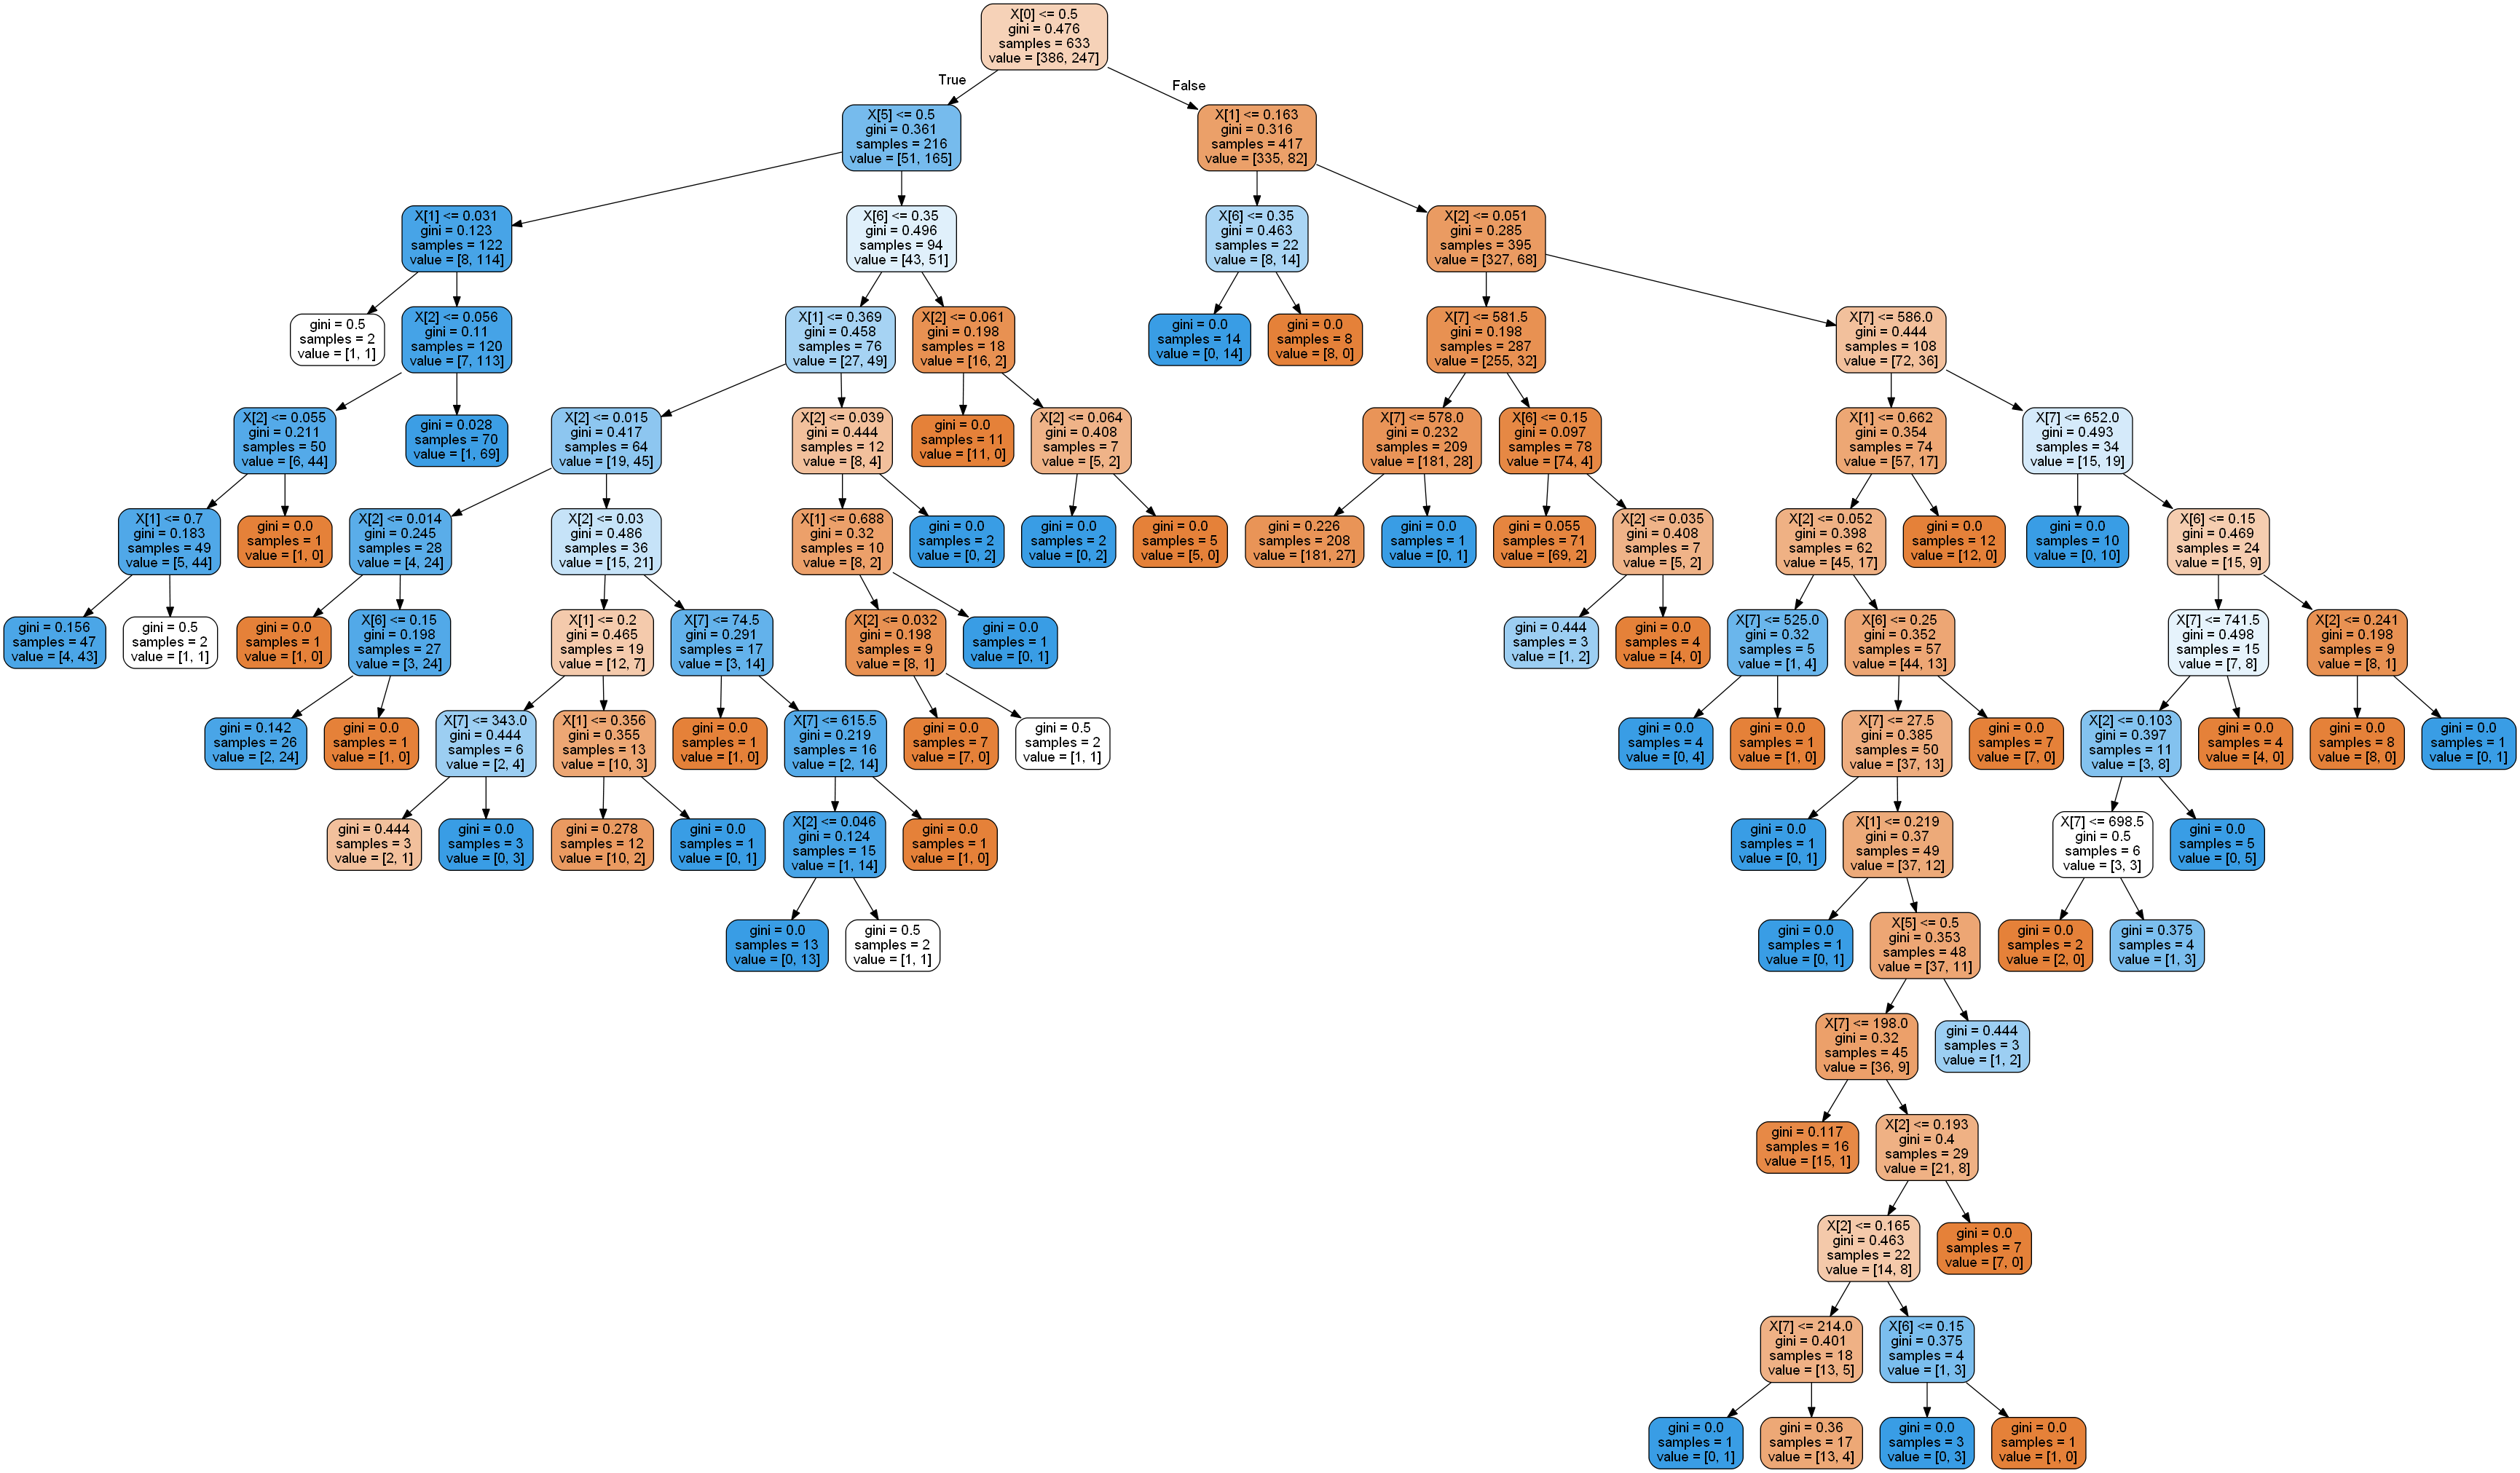

In [44]:
Image(graph[0].create_png())